Лабораторна робота 1

Алгоритм Козинця
1. Згенерувати N тривимiрних незалежних випадкових векторiв, в яких координати незалежнi, першi двi координати мають показниковий розподiл з параметром 1, третя координата має стандартний нормальний розподiл.
2. Реалiзувати алгоритм Козинця пошуку роздiляючого вектора для опуклої оболонки згенерованих векторiв. Алгоритм має працювати для довiльного N.

In [24]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [25]:
N = 50
vectors = np.column_stack([
    np.random.exponential(scale=1, size=(N, 1)),
    np.random.exponential(scale=1, size=(N, 1)),
    np.random.normal(size=(N, 1))
])

vectors[:10]

array([[ 1.61963732,  1.51077466, -1.86818063],
       [ 2.65637572,  0.31873444, -0.43128062],
       [ 1.53679664,  0.94277962,  0.41170634],
       [ 0.69949582,  1.90162029, -2.29286562],
       [ 0.11413853,  0.67873755,  1.06896518],
       [ 1.90577154,  1.19134591, -1.99382024],
       [ 0.26177667,  0.41542886,  0.00759656],
       [ 2.9965393 ,  0.78385939, -1.84590983],
       [ 0.1393356 ,  0.41917274, -0.20889511],
       [ 1.75143156,  0.41468156,  2.32079069]])

In [26]:
def kozynets(vectors, a):
    for i in range(vectors.shape[0]):
        dot_product = np.dot(vectors[i], a)
        
        if dot_product <= 0:
            print("Vector with dot product <= 0")
            print("Index:", i)
            print("Vector x:", vectors[i])
            print("Vector a:", a)
            
            x_i = vectors[i]
            
            func = lambda k: np.linalg.norm((1 - k) * a + k * x_i)
            k_opt = minimize_scalar(func, bounds=(0, 1), method='bounded').x
            
            a_new = (1 - k_opt) * a + k_opt * x_i
            print("Updated vector a:", a_new)
            
            return kozynets(vectors, a_new)
    
    return a

In [27]:
separator_vector = kozynets(vectors, vectors[0])

print("Separating vector:", separator_vector)

Vector with dot product <= 0
Index: 4
Vector x: [0.11413853 0.67873755 1.06896518]
Vector a: [ 1.61963732  1.51077466 -1.86818063]
Updated vector a: [0.42641354 0.85132114 0.45973372]
Vector with dot product <= 0
Index: 32
Vector x: [ 0.01758729  0.01759208 -0.48867491]
Vector a: [0.42641354 0.85132114 0.45973372]
Updated vector a: [ 0.1200666   0.22658057 -0.25094002]
Vector with dot product <= 0
Index: 4
Vector x: [0.11413853 0.67873755 1.06896518]
Vector a: [ 0.1200666   0.22658057 -0.25094002]
Updated vector a: [ 0.11936777  0.27988302 -0.09534321]
Vector with dot product <= 0
Index: 12
Vector x: [0.0658918  0.03798242 0.2458806 ]
Vector a: [ 0.11936777  0.27988302 -0.09534321]
Updated vector a: [0.08730172 0.13483104 0.1092664 ]
Vector with dot product <= 0
Index: 17
Vector x: [ 0.30542058  1.36970536 -2.15765977]
Vector a: [0.08730172 0.13483104 0.1092664 ]
Updated vector a: [0.08932182 0.14626775 0.08827142]
Vector with dot product <= 0
Index: 32
Vector x: [ 0.01758729  0.017592

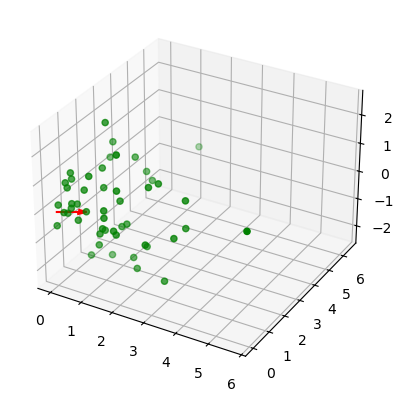

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c='green', marker='o')
ax.quiver(0, 0, 0, separator_vector[0], separator_vector[1], separator_vector[2], color='red', length=1.0, normalize=True)

plt.show()